### import

In [33]:
!curl -o car.jpg https://static.vecteezy.com/system/resources/previews/028/623/266/large_2x/car-icon-isolated-side-view-logo-vector.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 56087  100 56087    0     0   209k      0 --:--:-- --:--:-- --:--:--  210k


In [13]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter
import csv


### data preprocess

In [19]:
news = []

## Read csv file from news.csv
with open('news.csv', 'r', encoding='utf-8-sig') as f:
    reader = csv.DictReader(f)
    for row in reader:
        news.append({
            'title': row['Title'], 
            'content': row['Content']
        })

# Replace_words
replace_list = [
    '\n',
    '\r',
    '<br />',
    '<br>',
    '的',
    '及',
    '於',
    '並',
    '113'
]

with open('news.txt', 'w', encoding='utf-8') as f:
    for n in news:
        try:
            title = n['title']
            content = n['content']
            for replace_word in replace_list:
                title = title.replace(replace_word, ' ')
                content = content.replace(replace_word, ' ')
            f.write(title + '\n')
            f.write(content + '\n')
            f.write('\n')
            # print(n)
        except:
            pass



### word cloud

Building prefix dict from c:\Users\user\Desktop\datamining-final\dict.txt ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.uc3fa8744ffddcdc52e0586d23ca417bf.cache
Loading model cost 0.426 seconds.
Prefix dict has been built successfully.


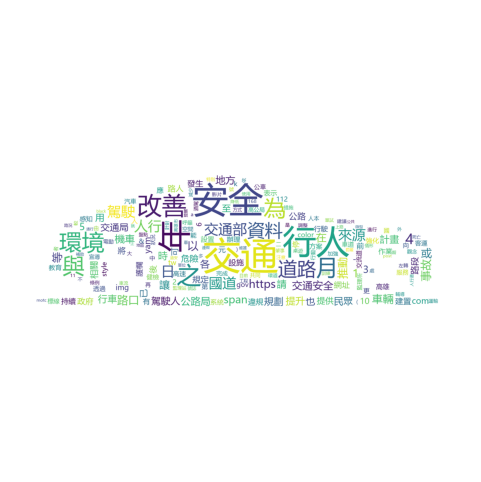

In [32]:
text = open('news.txt', "r",encoding="utf-8").read()  #讀文字資料

jieba.set_dictionary('dict.txt')
with open('stopWord_test.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
    stops = f.read().split('\n')
terms = []  #儲存字詞
for t in jieba.cut(text, cut_all=False):  #拆解句子為字詞
    if t not in stops:  #不是停用詞
        terms.append(t)
diction = Counter([x for x in terms if x != '\n'])

font = 'msyh.ttc'  #設定字型
mask = np.array(Image.open("car.jpg"))  #設定文字雲形狀
wordcloud = WordCloud(font_path=font)
wordcloud = WordCloud(background_color="white",mask=mask,font_path=font)  #背景顏色預設黑色,改為白色
wordcloud.generate_from_frequencies(frequencies=diction)  #產生文字雲

#產生圖片
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("news_Wordcloud.png")  #存檔